In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
from scipy import special
from scipy import stats
sns.set(rc={'figure.figsize' : (12, 5)}, font='verdana')
plt.style.use('dark_background')

In [2]:
url='https://drive.google.com/file/d/1ZnhQzDliRiOlrADRJV_ZTlxOqqsMo4sc/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,sep = ';')

In [3]:
df_a = df[df.testgroup == 'a']
df_a.head(1)

,user_id,revenue,testgroup
1,2,0,a


In [4]:
df_b = df[df.testgroup == 'b']
df_b.head(1)

,user_id,revenue,testgroup
0,1,0,b


Проверим все ли записи в обеих группах уникальны

In [7]:
(df_a.user_id.nunique() == len(df_a))*1 + (df_b.user_id.nunique() == len(df_b))*1

2

Посмотрим на общие метрики по группам

In [6]:
print(f'Группа А: \n\
Клиентов всего:       {len(df_a)}\n\
Заплативших клиентов: {len(df_a[df_a.revenue > 0])}    \n\
СR в оплату:          {round(len(df_a[df_a.revenue > 0]) / len(df_a), 4)} \n\
Средний чек:          {round(df_a[df_a.revenue > 0].revenue.sum() / len(df_a[df_a.revenue > 0]),1)} \n\
Самый большой заказ:  {df_a.revenue.max()}\n\
    ')

Группа А: 
Клиентов всего:       202103
Заплативших клиентов: 1928    
СR в оплату:          0.0095 
Средний чек:          2664.0 
Самый большой заказ:  37433
    


In [7]:
print(f'Группа B: \n\
Клиентов всего:       {len(df_b)}\n\
Заплативших клиентов: {len(df_b[df_b.revenue > 0])}    \n\
СR в оплату:          {round(len(df_b[df_b.revenue > 0]) / len(df_b), 4)} \n\
Средний чек:          {round(df_b[df_b.revenue > 0].revenue.sum() / len(df_b[df_b.revenue > 0]),1)} \n\
Самый большой заказ:  {df_b.revenue.max()}\n\
    ')

Группа B: 
Клиентов всего:       202667
Заплативших клиентов: 1805    
СR в оплату:          0.0089 
Средний чек:          3003.7 
Самый большой заказ:  4000
    


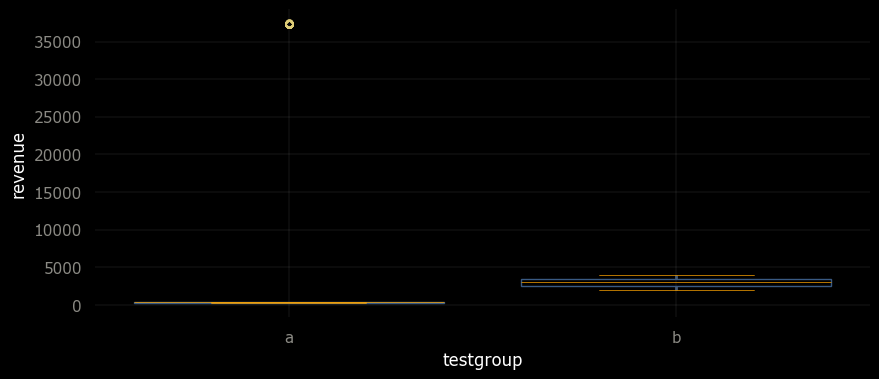

In [14]:
plt.figure(figsize=(10,4))
boxplot_style = {
    'medianprops':  {'linewidth': 4, 'color': '#571a18'},
    'flierprops':   {'marker': 'o', 'markerfacecolor': 'green', 'markersize': 8},
    'boxprops':     {'facecolor': 'none', 'edgecolor ': '#435975', 'linewidth': 1},
    'capprops':     {'color': 'orange', 'linewidth': 1}}
sns.boxplot(x = df[df.revenue>0].testgroup, y = df[df.revenue>0].revenue, 
                                                            whiskerprops = {'linewidth': 2, 'color': '#435975'},
                                                            medianprops  = {'linewidth': 4, 'color': 'orange', 'linewidth': 0.5},
                                                            flierprops   = {'marker': 'o', 'markeredgecolor': '#e0ce79', 'markersize': 5, 'markerfacecolor' :'none', 'linewidth': 0.1},
                                                            boxprops     = {'facecolor': 'none', 'edgecolor': '#395a83', 'linewidth': 1},
                                                            capprops     = {'color': 'orange', 'linewidth': 0.5})
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)
plt.show()

<Figure size 1300x600 with 0 Axes>

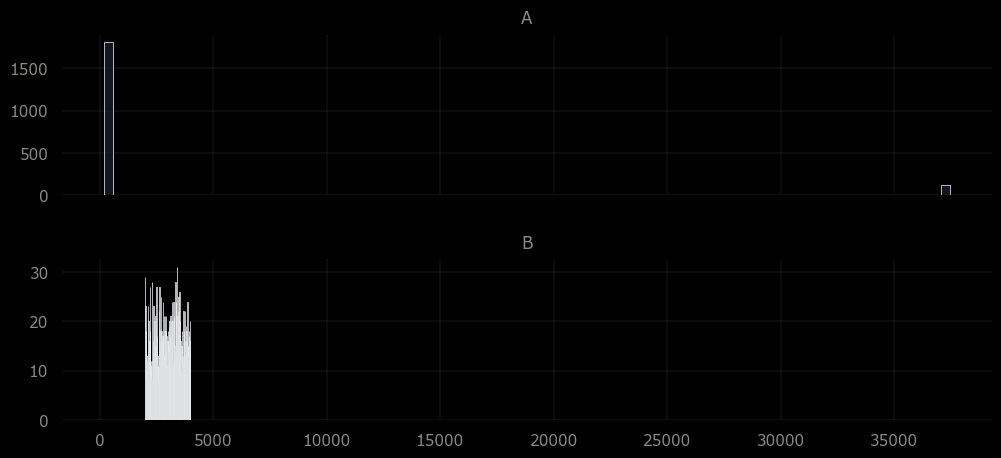

In [19]:
plt.figure(figsize=(13,6))
fig, ax = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(2, 1, 1)
sns.histplot(df_a[df_a.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('A', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')


for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 1, 2)
sns.histplot(df_b[df_b.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('B', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()

Очевидно, что оба распределения не являются нормальными

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

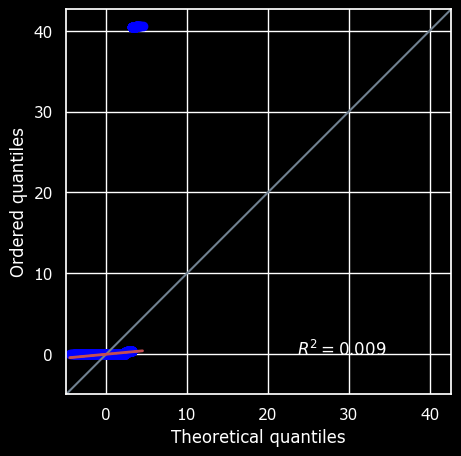

In [20]:
pg.qqplot(df_a.revenue)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

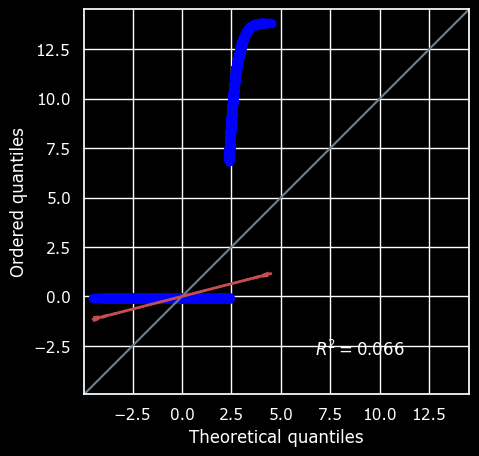

In [21]:
pg.qqplot(df_b.revenue)

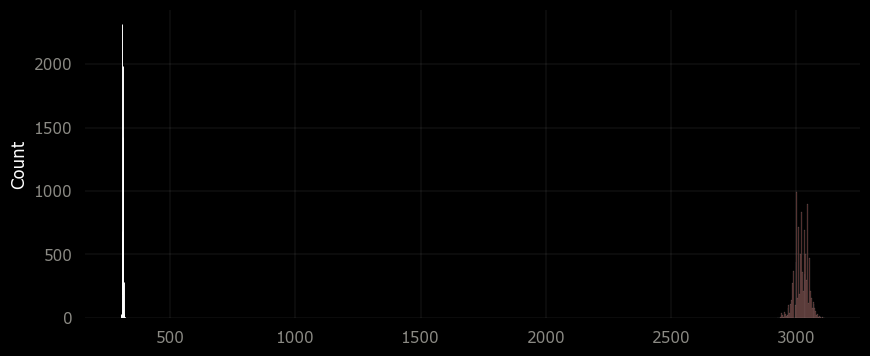

In [23]:
t_a = pd.Series([df_a[df_a.revenue>0].revenue.sample(frac=1, replace = True).median() for _ in range(10000)])
t_b = pd.Series([df_b[df_b.revenue>0].revenue.sample(frac=1, replace = True).median() for _ in range(10000)])

plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(t_a, color='#171e2f')
sns.histplot(t_b, color='#592927')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)


<Figure size 1300x600 with 0 Axes>

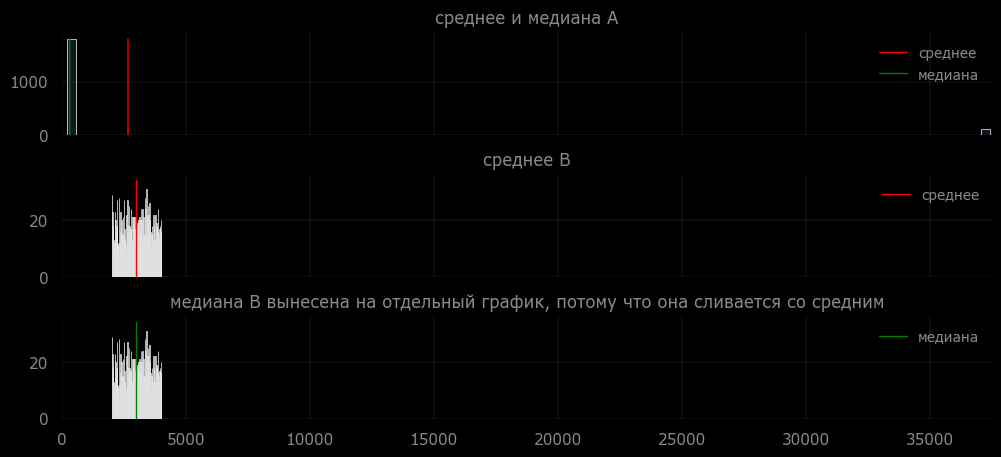

In [ ]:
plt.figure(figsize=(13,6))
fig, ax = plt.subplots(3, 1, sharex=True)
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(3, 1, 1)
sns.histplot(df_a[df_a.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.plot(np.array([df_a[df_a.revenue > 0].revenue.mean()]*1800), np.array(range(1800)), linewidth = 1, color='red', label = 'среднее')
plt.plot(np.array([df_a[df_a.revenue > 0].revenue.median()]*1800), np.array(range(1800)), linewidth = 1, color='green', label = 'медиана')
plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('среднее и медиана A', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-5, 37500)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(3, 1, 2)
sns.histplot(df_b[df_b.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.plot(np.array([df_b[df_b.revenue > 0].revenue.mean()]*35), np.array(range(35)), linewidth=1, color='red', label = 'среднее')
plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('среднее B', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(3, 1, 3)
sns.histplot(df_b[df_b.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.plot(np.array([df_b[df_b.revenue > 0].revenue.mean()]*35), np.array(range(35)), linewidth=1, color='green', label = 'медиана')
plt.title('медиана В вынесена на отдельный график, потому что она сливается со средним', fontsize=12, y=1.02,color='#8b8a84')
plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')

plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()

<Figure size 1300x600 with 0 Axes>

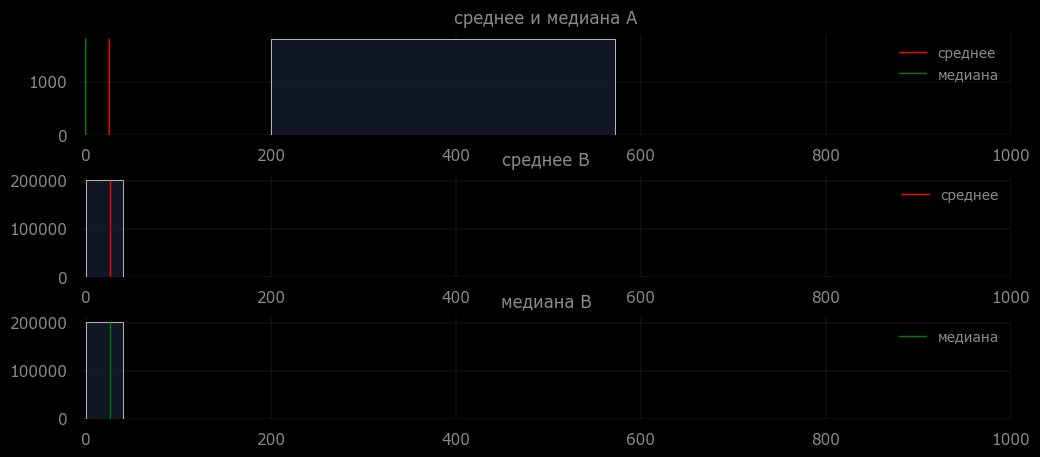

In [253]:
plt.figure(figsize=(13,6))
fig, ax = plt.subplots(3, 1, sharex=False)
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(3, 1, 1)
sns.histplot(df_a[df_a.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.plot(np.array([df_a.revenue.mean()]*1800), np.array(range(1800)), linewidth = 1, color='red', label = 'среднее')
plt.plot(np.array([df_a.revenue.median()]*1800), np.array(range(1800)), linewidth = 1, color='green', label = 'медиана')
plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('среднее и медиана A', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-5, 1000)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(3, 1, 2)
sns.histplot(df_b.revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.plot(np.array([df_b.revenue.mean()]*200000), np.array(range(200000)), linewidth=1, color='red', label = 'среднее')
plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlim(-5, 1000)
plt.title('среднее B', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(3, 1, 3)
sns.histplot(df_b.revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.plot(np.array([df_b.revenue.mean()]*200000), np.array(range(200000)), linewidth=1, color='green', label = 'медиана')
plt.title('медиана В', fontsize=12, y=1.02,color='#8b8a84')
plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlim(-5, 1000)

plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()

<Figure size 1300x600 with 0 Axes>

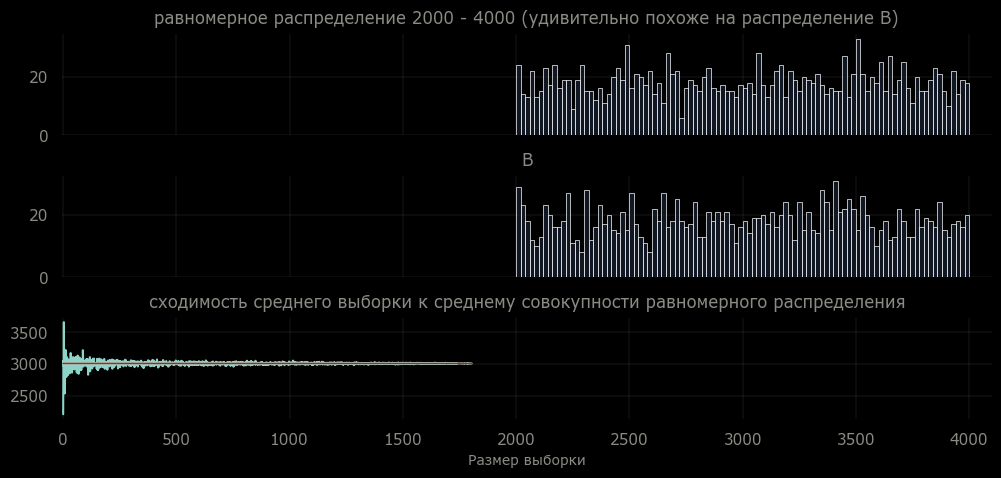

In [209]:
uni = np.random.uniform(2000, 4000, 1805)

plt.figure(figsize=(13,6))
fig, ax = plt.subplots(3, 1, sharex=True)
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(3, 1, 1)
sns.histplot(uni, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('равномерное распределение 2000 - 4000 (удивительно похоже на распределение В)', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-5, 4100)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(3, 1, 2)
sns.histplot(df_b[df_b.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('B', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(3, 1, 3)

plt.title('сходимость среднего выборки к среднему совокупности равномерного распределения', fontsize=12, y=1.02,color='#8b8a84')
plt.plot([pd.Series(uni).sample(_).mean() for _ in range(1805)])
sns.lineplot(x=pd.Series(uni).index, y = np.array([uni.mean()]*1805), linewidth=1, color = 'red')
plt.xlabel("Размер выборки", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()

Посмотрим к какому логнормальному распределению могла бы принадлежать выборка со средней амплитудой в 37000. Для этого переберем распределения с параметром S с шагом в 0,1, сделав по 10000 выборок из каждого и посчитав среднюю аплитуду для каждого шага

In [174]:
df_t = pd.DataFrame({'n': [1], 'r': [1]})

ex_mean = []
rng = []
for n in range(27, 32, 1):
    l = stats.lognorm(n/10)
    for i in range(10000):
        e = l.rvs(size = 1928)
        ex_mean.append((e.max() - e.min()))
    df_t1 = pd.DataFrame({'n': [n], 'r': [sum(ex_mean)/len(ex_mean)]})
    df_t = pd.concat([df_t, df_t1])
df_t

,n,r
0,1,1.000000
0,27,18006.847420
0,28,22867.750118
0,29,28668.578143
0,30,35498.711234
0,31,46195.596447


Как видим, мы могли бы получить в выборке из 1928 значений такой хвост в случае если s логнормального распределения было бы примерно 3,0.

In [283]:
l = stats.lognorm(3)
l_example = l.rvs(size = 1928)
df_bins = pd.DataFrame()
df_bins['a_bins'] = pd.cut(df_a[df_a.revenue > 0].revenue.values, 10).value_counts().values
df_bins['l_bins'] = pd.cut(l_example, 10).value_counts().values 
df_bins

,a_bins,l_bins
0,1805,1910
1,0,11
2,0,1
3,0,3
4,0,0
5,0,0
6,0,1
7,0,1
8,0,0
9,123,1


Но все это фигня и логнормальное распределение тут не причем, хотя бы потому что логарифмирование группы А не дает нормального распределения, а значит исследование сходимости группы А через голнормлаьное распределение - натягивание совы на глобус. Группу А можно было бы получить например так

<Figure size 1300x600 with 0 Axes>

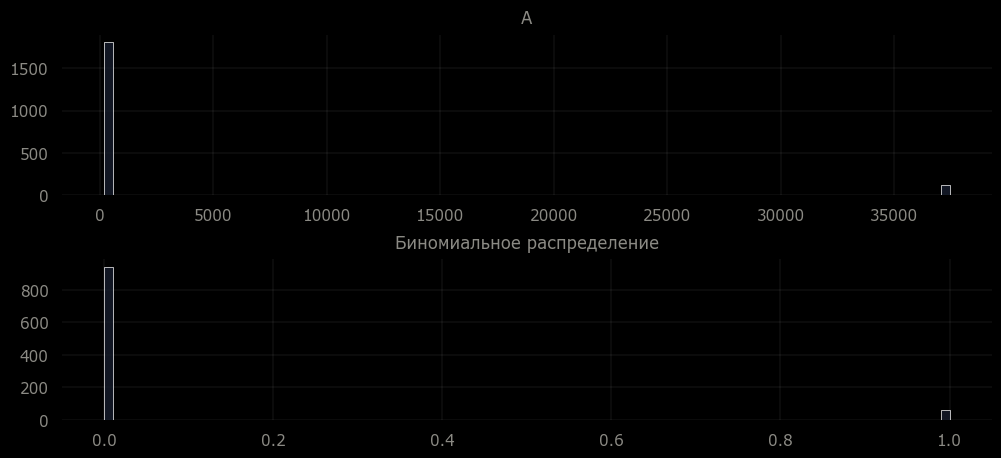

In [10]:
plt.figure(figsize=(13,6))
fig, ax = plt.subplots(2, 1, sharex=False)
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(2, 1, 1)
sns.histplot(df_a[df_a.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('A', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')


for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 1, 2)
sns.histplot(np.random.binomial(1,123/(1805+123),1000), linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Биномиальное распределение', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()

Поэтому на это можно и не смотреть, но оставлю как шаблон

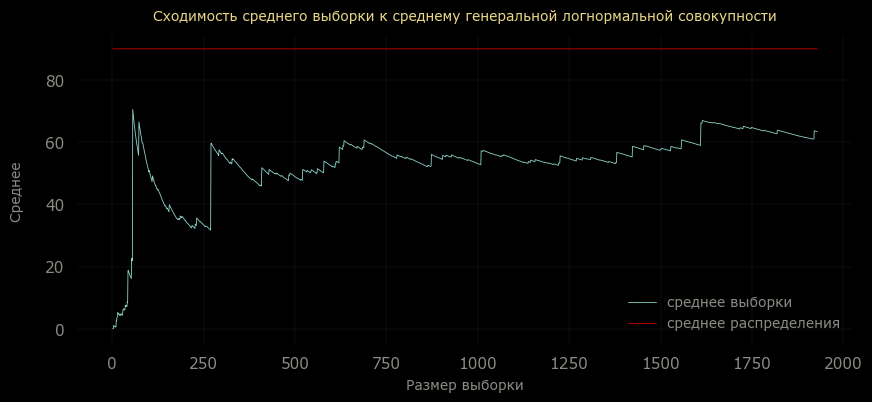

In [286]:
l_mean = l.stats(moments='m')

a = pd.Series(l.rvs(1928)).to_frame()
a.columns=['res']
a['csum']=a['res'].cumsum()
a['num']=range(1,1929)
a['cmean']=a.csum/a.num

plt.figure(figsize=(10,4))

sns.lineplot(x = a.num, y = a.cmean, linewidth=0.6, label = 'среднее выборки')
sns.lineplot(x = a.num, y = np.array([l_mean]*1928), linewidth=0.5, color = 'red', label = 'среднее распределения')

plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.title('Сходимость среднего выборки к среднему генеральной логнормальной совокупности', fontsize=10, y=1.02, color = '#e7d688')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('Среднее ', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 
plt.show()

100 средних выборок в 100000 наблюдений

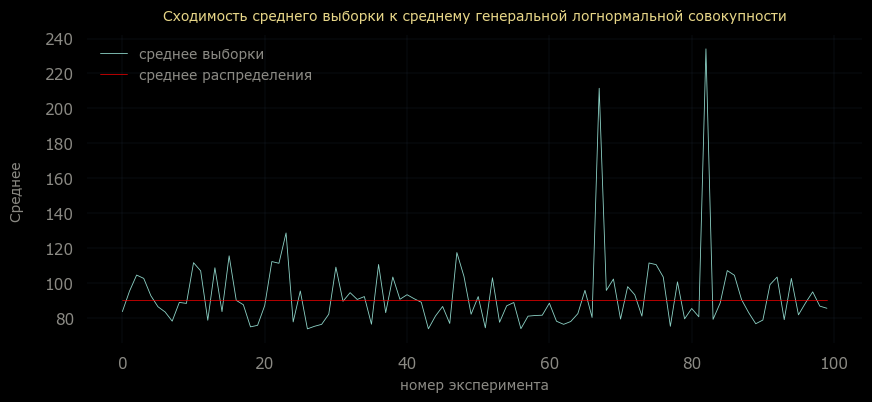

In [287]:
t = pd.Series([l.rvs(100000).mean() for n in range(1, 101)])

plt.figure(figsize=(10,4))

sns.lineplot(x = t.index, y = t.values, linewidth=0.6, label = 'среднее выборки')
sns.lineplot(x = t.index, y = np.array([l_mean]*100), linewidth=0.5, color = 'red', label = 'среднее распределения')

plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.title('Сходимость среднего выборки к среднему генеральной логнормальной совокупности', fontsize=10, y=1.02, color = '#e7d688')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("номер эксперимента", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('Среднее ', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 
plt.show()

Даже при размере выборки в 100 000 срденее выборки очень плохо сходится к истинному среднему. Оно и понятно, каждое попавшее в выборку значение из хвоста сильно меняет ее среднее, образует новую ступеньку. То есть, среднее конкретной, отдельно взятой выборки определется лишь тем сколько значений из хвоста СЛУЧАЙНЫМ образом в нее попали.

Если мы логарифмируем группу А, то все-равно не получим нормланое распределение, а значит выборка А явно не логнормальна

C:\Users\mail\AppData\Local\Temp\ipykernel_11420\1988758716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['lg']=np.log(df_check.revenue)


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

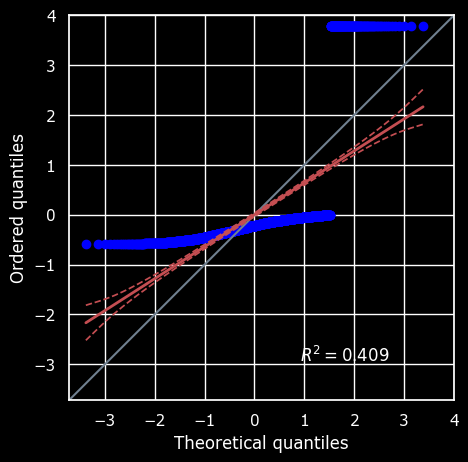

In [297]:
df_check = df_a[df_a.revenue > 0]
df_check['lg']=np.log(df_check.revenue)
pg.qqplot(df_check.lg)